In [1]:
import numpy as np
import matplotlib.pyplot as plt

G1 = np.array([22, 20, 23, 23, 17, 24, 23, 18, 22, 19])
G2 = np.array([40, 35, 27, 22, 25, 26, 19, 31, 30, 36])
Data = 25


In [2]:
def hanbetsu_bunseki(G1, G2, Data):
    # 1変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    D_G1 = np.abs( Data-np.mean(G1) ) / np.std(G1, ddof=1)
    D_G2 = np.abs( Data-np.mean(G2) ) / np.std(G2, ddof=1)
    #Ans = 1 if D_G1 < D_G2 else 2
    if D_G1 < D_G2:
        Ans = 1
    else:
        Ans = 2
        
    return Ans

In [3]:
hanbetsu_bunseki(G1, G2, Data)

2

In [5]:
def hanbetsu_bunseki(G1, G2, Data):
    # 1変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    D_G1 = np.abs( Data-np.mean(G1) ) / np.std(G1, ddof=1)
    D_G2 = np.abs( Data-np.mean(G2) ) / np.std(G2, ddof=1)
    Ans = 1 if D_G1 < D_G2 else 2

    # 境界線
    A = np.mean(G1)*np.std(G2, ddof=1)
    B = np.mean(G2)*np.std(G1, ddof=1)
    C = np.std(G1, ddof=1)+np.std(G2, ddof=1)    
    Kyokai = (A+B)/C
    
    if np.mean(G1)>np.mean(G2):
        TrueR1 = len(np.where(G1 >= Kyokai)[0]) / len(G1)
        TrueR2 = len(np.where(G2 < Kyokai)[0]) / len(G2)
    else:
        TrueR2 = len(np.where(G2 >= Kyokai)[0]) / len(G2)
        TrueR1 = len(np.where(G1 < Kyokai)[0]) / len(G1)
        
    return Ans, TrueR1, TrueR2

hanbetsu_bunseki(G1, G2, Data)

(2, 0.9, 0.8)

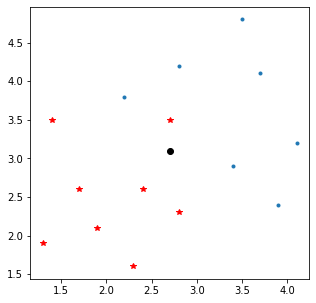

In [7]:

G1 = np.array( [[3.4, 3.9, 2.2, 3.5, 4.1, 3.7, 2.8], [2.9, 2.4, 3.8, 4.8, 3.2, 4.1, 4.2]] )
G2 = np.array( [[1.4, 2.4, 2.8, 1.7, 2.3, 1.9, 2.7, 1.3], [3.5, 2.6, 2.3, 2.6, 1.6, 2.1, 3.5, 1.9]] )
Data = np.array( [2.7, 3.1] )

fig = plt.figure(figsize=(5, 5))
plt.plot(G1[0], G1[1], '.')
plt.plot(G2[0], G2[1], 'r*')
plt.plot(Data[0], Data[1], 'ko')

In [8]:

def hanbetsu_bunseki2(G1, G2, Data):
    # 2変数の判別分析. G1,G2:学習データ. Data:判別したい新規データ.
    
    # マハラノビス距離
    tmp = np.dot( Data-np.mean(G1,axis=1), np.linalg.inv(np.cov(G1)) )
    D_G1 = np.dot(tmp, (Data-np.mean(G1,axis=1)).T)
    tmp = np.dot( Data-np.mean(G2,axis=1), np.linalg.inv(np.cov(G2)) )
    D_G2 = np.dot(tmp, (Data-np.mean(G2,axis=1)).T)
    
    if D_G1 < D_G2:
        Ans = 1
    else:
        Ans = 2
            
    return Ans
    

In [9]:
hanbetsu_bunseki2(G1, G2, Data)

2

In [10]:
def seito_ritu(G1, G2):
    
    # グループ1の正答率
    True1 = 0
    for i in range( len(G1[0]) ):
        Data = G1[:,i]
        Ans = hanbetsu_bunseki2(G1, G2, Data)
        
        if Ans == 1:
            True1 = True1+1
            
    TrueR1 = True1/len(G1[0])
    
    
    # グループ2の正答率
    True2 = 0
    for i in range( len(G2[0]) ):
        Data = G2[:,i]
        Ans = hanbetsu_bunseki2(G1, G2, Data)
        
        if Ans == 2:
            True2 = True2+1
            
    TrueR2 = True2/len(G2[0])    
    
    return TrueR1, TrueR2

In [12]:
seito_ritu(G1, G2)

(1.0, 0.875)